In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

sns.set()
# sns.set_theme(style="ticks")

In [4]:
def addGenIdx(df: pd.DataFrame, idx: int):

     genIdx = [f'{idx}' for x in range(len(df))]
     insert_index = 0
     insert_colname = 'Gen'
     insert_values = genIdx # this can be a numpy array too
     df.insert(loc=insert_index, column=insert_colname, value=insert_values)
     return df

In [6]:
folderDir = 'SRC\RES60\MaxUsers'
folderDir = 'SRC\RES40\WinMean'
for i in range(20):
     idx = i
     df = pd.read_csv(folderDir + f'\\gen_{idx}.csv')
     new_df = addGenIdx(df, idx=idx)
     if i == 0:
          DF = new_df
     else:
          DF = DF.append(new_df)

In [3]:
# DF['Eval'] = DF['Eval'] / 60 # Minutes

C:\Users\warmachine\.conda\envs\SatWiz\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


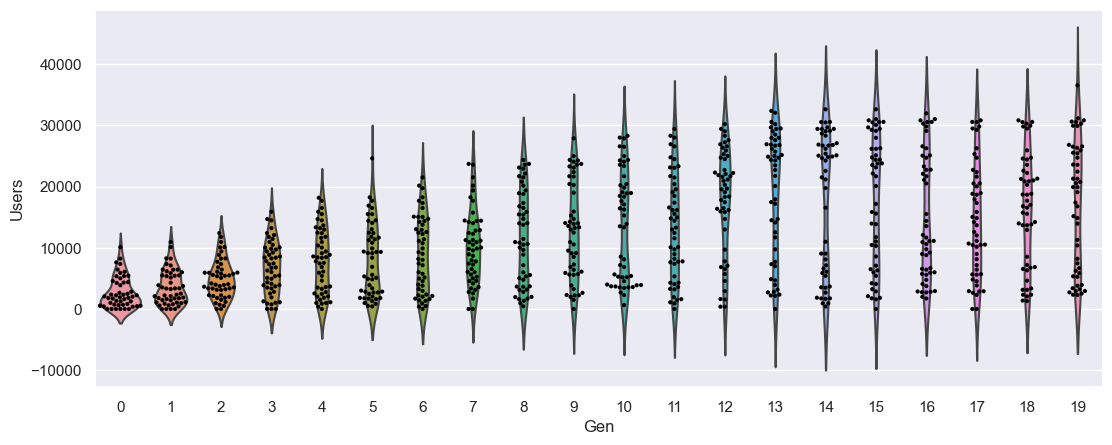

In [7]:
fig, ax = plt.subplots(figsize=(13,5), dpi=100)
ax = sns.violinplot(ax=ax, x="Gen", y="Eval",
               #  col="Users", data=df)
               data=DF, inner=None)

# ax = sns.boxplot(ax=ax, x="Gen", y="Eval",
#                #  col="Users", data=df)
#                data=DF)


ax = sns.swarmplot(x="Gen", y="Eval", data=DF,
                   color="black", size=3,)
ax.set_ylabel('Users')
plt.show()

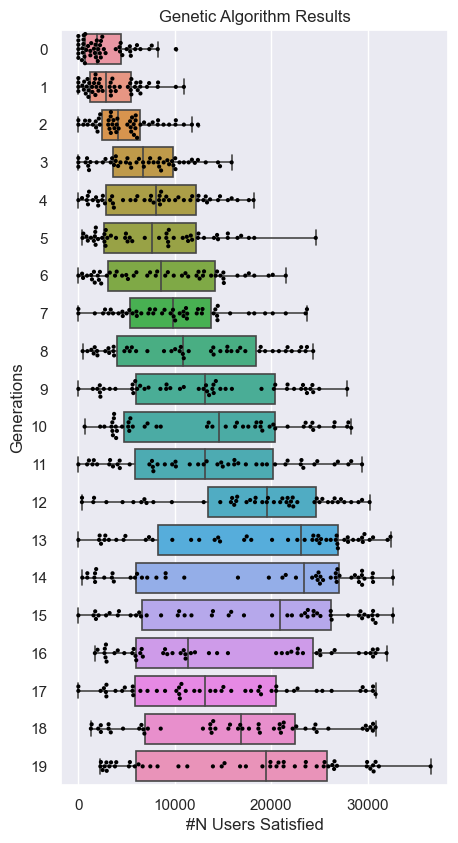

In [8]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
# ax = sns.violinplot(ax=ax, x="Eval", y="Gen",
#                #  col="Users", data=df)
#                data=DF, inner=None)
#                # data=DF)

ax = sns.boxplot(ax=ax, x="Eval", y="Gen",
               linewidth=1.2, 
               fliersize=2, 
               #  col="Users", data=df)
               data=DF)


ax = sns.swarmplot(x="Eval", y="Gen", data=DF,
                   color="black", size=3,)
ax.set_xlabel('#N Users Satisfied')
ax.set_ylabel('Generations')
ax.set_title('Genetic Algorithm Results')
plt.savefig(folderDir+'\\Results.png')
plt.show()

In [9]:
MAXUSERS = []
for idx in range(20):
     df = pd.read_csv(f'SRC\\RES60\\MaxUsers\\gen_{idx}.csv')
     df.drop(columns='Unnamed: 0', inplace=True)
     df.sort_values(by=['Eval'], ascending=False)

     maxUser = df['Eval'].max()
     MAXUSERS.append(maxUser) # Depends on the metrics

In [10]:
len(MAXUSERS)

20

(1.0, 20.0)

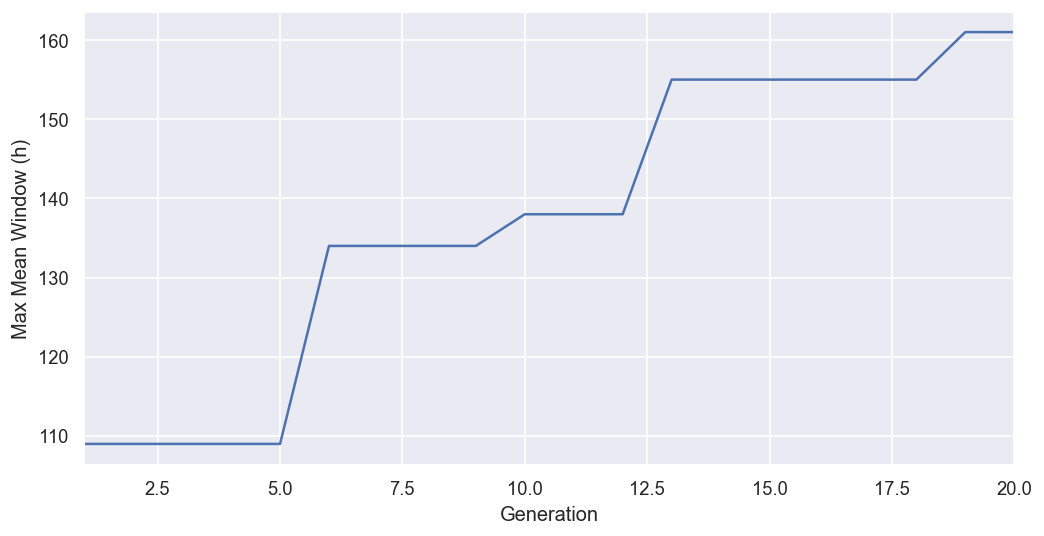

In [11]:
plt.figure(figsize=(10,5), dpi=120)
# plt.plot( range(1,21,1), [x/3600 for x in MAXUSERS])
plt.plot( range(1,21,1), [x for x in MAXUSERS])
plt.xlabel("Generation")
plt.ylabel("Max Mean Window (h)")
plt.xlim([1,20])